In [1]:
using Gadfly, Optim, Distributions, Distances, Cairo, Fontconfig

In [2]:
# Distribution cible
distTarget = GeneralizedExtremeValue(5, 1, 0);

In [3]:
function initializeValues(f::Function)
    F(x::Real) = -f(x)
    res = optimize(F, -100, 100)
    return Optim.minimizer(res), 1
end;

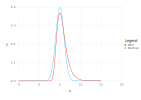

In [4]:
densityTarget(x::Real) = pdf(distTarget, x);
θ₀ = initializeValues(densityTarget);

a = θ₀[1]-10;
b = θ₀[1]+10;

xx = a:.1:b

p = plot(
    layer(x=xx, y=pdf.(GeneralizedExtremeValue(5, 1, 0), xx), Geom.line, Theme(default_color="red")),
    layer(x=xx, y=pdf.(Normal(θ₀[1], θ₀[2]), xx), Geom.line, Theme(default_color="deepskyblue")),
    Guide.manual_color_key("Legend", ["GEV", "Normal"], ["red", "deepskyblue"]),
    Theme(background_color="white"),
)

In [7]:
function KLOptim(distTarget::Distribution)
    # Distribution d'approximation (état initial)
    densityTarget(x::Real) = pdf(distTarget, x);
    θ₀ = initializeValues(densityTarget);
    
    # Délimitation de l'intervalle de calcul de la KL
    a = θ₀[1]-10;
    b = θ₀[1]+10;
    x = a:.1:b

    function KLDivergence(θ::Vector{<:Real})
        # Distribution d'approximation
        distApprox = Normal(θ[1], θ[2])
        
        # Évaluation des densités
        p = pdf.(distTarget, x)
        q = pdf.(distApprox, x)
        return kl_divergence(p, q)
    end;
    
    res = optimize(KLDivergence, [θ₀...]);
    return res
end;

In [8]:
res = KLOptim(distTarget)

 * Status: success

 * Candidate solution
    Final objective value:     8.954507e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    32
    f(x) calls:    66


In [9]:
θ̂ = Optim.minimizer(res);

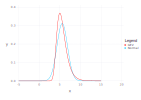

In [11]:
x = a:.1:b

p = plot(
    layer(x=x, y=pdf.(distTarget, x), Geom.line, Theme(default_color="red")),
    layer(x=x, y=pdf.(Normal(θ̂[1], θ̂[2]), x), Geom.line, Theme(default_color="deepskyblue")),
    Guide.manual_color_key("Legend", ["GEV", "Normal"], ["red", "deepskyblue"]),
    Theme(background_color="white"),
)